/home/vipuser/miniconda3/envs/tf_design/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/vipuser/miniconda3/envs/tf_design/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


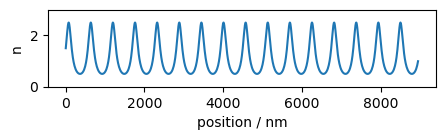

In [2]:
import sys
sys.path.append('./../../')
sys.path.append('./..')
sys.path.append('./../../designer/script/')


from film import FreeFormFilm, BaseFilm, TwoMaterialFilm, EqOTFilm
from design import BaseDesign
from spectrum import BaseSpectrum, Spectrum
from optimizer.adam import AdamFreeFormOptimizer

from analyze_utils.make_design import make_edgefilter_design, make_triband_filter_design, make_reflection_design, get_minus_filter_spec

from utils.loss import calculate_RMS_f_spec
from analyze_utils.result_io import save, load
from analyze_utils.structure import plot_layer_thickness

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import copy
import pickle


n_size = 1000
each_ot = 10 # nm
init_n = np.sin(5 * np.linspace(0, 20, n_size)) + 1.5

film = EqOTFilm(init_n, each_ot * n_size, substrate=1.5)

fig, ax = plt.subplots(1, 1)
ax.plot(np.cumsum(film.get_d()), film.get_n())
ax.set_ylim(0, 3)
ax.set_xlabel('position / nm')
ax.set_ylabel('n')

fig.set_size_inches(5, 1)
fig.savefig('./demo.png',dpi=300, bbox_inches='tight')

In [12]:
wls = np.linspace(500, 1000, 500)
target = get_minus_filter_spec(wls)
adam = AdamFreeFormOptimizer(film, [target], 100)

adam.optimize()



/home/vipuser/miniconda3/envs/tf_design/lib/python3.10/site-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 32 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


[(<film.EqOTFilm at 0x7fac8be83fa0>,), (0.09124049187110751,)]

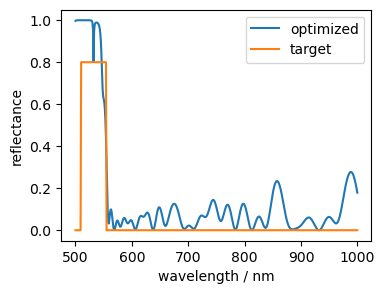

In [16]:
fig, ax = plt.subplots(1, 1)
ax.plot(wls, film.get_spec(0., wls).get_R(), label='optimized')
ax.plot(wls, target.get_R(), label='target')

ax.legend()
ax.set_xlabel('wavelength / nm')
ax.set_ylabel('reflectance')
fig.set_size_inches(4, 3)